In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

In [59]:
url = "C:\\Users\\Asus\\Downloads\\fifa_players.csv2\\fifa_players.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о футболистах (гражданство, рос, вес, позиции на поле, трансферная стоимость, зарплата, общий рейтинг и потенциал в FIFA, характеристика в FIFA)
Полностью таблица не нужна.

In [60]:
data_raw.shape

(17954, 51)

In [61]:
pd.set_option('display.max_columns', None)  # показывать все столбцы

In [62]:
data_raw = data_raw.drop(data_raw.columns[13:51], axis = 1)
data_raw = data_raw.drop(data_raw.columns[[1, 2, 5]], axis = 1)

In [63]:
data_raw = data_raw.drop(data_raw.columns[[3]], axis = 1)

In [64]:
data_raw

,name,age,height_cm,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot
0,L. Messi,31,170.18,Argentina,94,94,110500000.0,565000.0,Left
1,C. Eriksen,27,154.94,Denmark,88,89,69500000.0,205000.0,Right
2,P. Pogba,25,190.50,France,88,91,73000000.0,255000.0,Right
3,L. Insigne,27,162.56,Italy,88,88,62000000.0,165000.0,Right
4,K. Koulibaly,27,187.96,Senegal,88,91,60000000.0,135000.0,Right
...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,Scotland,67,70,975000.0,3000.0,Right
17950,M. Sipľak,23,182.88,Slovakia,59,67,190000.0,1000.0,Left
17951,J. Bekkema,22,185.42,Netherlands,59,67,170000.0,1000.0,Right
17952,A. Al Yami,21,175.26,Saudi Arabia,59,71,280000.0,4000.0,Right


In [65]:
data_raw.shape

(17954, 9)

In [66]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17954 non-null  object 
 1   age             17954 non-null  int64  
 2   height_cm       17954 non-null  float64
 3   nationality     17954 non-null  object 
 4   overall_rating  17954 non-null  int64  
 5   potential       17954 non-null  int64  
 6   value_euro      17699 non-null  float64
 7   wage_euro       17708 non-null  float64
 8   preferred_foot  17954 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


 0   name             
 1   age               
 2   height_cm             
 3   positions - позиции, на которых играет футболист (номинальный)      
 4   nationality - национальность игрока (номинальный)     
 5   overall_rating    
 6   potential         
 7   value_euro      
 8   wage_euro       
 9  preferred_foot - рабочая нога (бинарный)

In [67]:
data_raw['nationality'] = data_raw['nationality'].astype('category')
data_raw['preferred_foot'] = data_raw['preferred_foot'].astype('category')

In [68]:
data_raw['nationality'].dtype

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                  'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria',
                  ...
                  'United Arab Emirates', 'United States', 'Uruguay',
                  'Uzbekistan', 'Venezuela', 'Vietnam', 'Wales', 'Yemen',
                  'Zambia', 'Zimbabwe'],
, ordered=False)

In [69]:
data_raw['preferred_foot'].dtype

CategoricalDtype(categories=['Left', 'Right'], ordered=False)

информация о числовых признаках

In [70]:
data_raw.describe()

,age,height_cm,overall_rating,potential,value_euro,wage_euro
count,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000
mean,25.565445,174.946921,66.240169,71.430935,2.479280e+06,9902.134628
std,4.705708,14.029449,6.963730,6.131339,5.687014e+06,21995.593750
min,17.000000,152.400000,47.000000,48.000000,1.000000e+04,1000.000000
25%,22.000000,154.940000,62.000000,67.000000,3.250000e+05,1000.000000
50%,25.000000,175.260000,66.000000,71.000000,7.000000e+05,3000.000000
75%,29.000000,185.420000,71.000000,75.000000,2.100000e+06,9000.000000
max,46.000000,205.740000,94.000000,95.000000,1.105000e+08,565000.000000


In [71]:
data_raw.describe(include=['category'])

,nationality,preferred_foot
count,17954,17954
unique,160,2
top,England,Right
freq,1658,13781


Пропущенные значения

In [72]:
data_raw.isnull().sum()

name                0
age                 0
height_cm           0
nationality         0
overall_rating      0
potential           0
value_euro        255
wage_euro         246
preferred_foot      0
dtype: int64

In [73]:
data_raw = data_raw.dropna()

In [74]:
data_raw.isnull().sum()

name              0
age               0
height_cm         0
nationality       0
overall_rating    0
potential         0
value_euro        0
wage_euro         0
preferred_foot    0
dtype: int64

In [75]:
data_raw.set_index(data_raw.columns[0], inplace = True)

In [76]:
data_raw.index

Index(['L. Messi', 'C. Eriksen', 'P. Pogba', 'L. Insigne', 'K. Koulibaly',
       'V. van Dijk', 'K. Mbappé', 'S. Agüero', 'M. Neuer', 'E. Cavani',
       ...
       'Cristiano Ronaldo', 'J. Serra', 'A. Rodriguez', 'A. Calisir',
       'R. Torres', 'R. McKenzie', 'M. Sipľak', 'J. Bekkema', 'A. Al Yami',
       'Júnior Brumado'],
      dtype='object', name='name', length=17699)

In [77]:
rows_to_drop = data_raw[
    (data_raw['value_euro'] < data_raw['value_euro'].quantile(0.005)) | (data_raw['value_euro'] > data_raw['value_euro'].quantile(0.995)) |
    (data_raw['age']  < data_raw['age' ].quantile(0.005)) | (data_raw['age']  > data_raw['age'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(17489, 8)

In [78]:
X = data_raw.drop(['value_euro', 'height_cm', 'age', 'nationality'], axis=1)

In [79]:
# Кодирование бинарных категориальных переменных
enc = OneHotEncoder(drop='if_binary', sparse=False)  # Используем One-Hot Encoding для бинарных категорий
encoded_features = enc.fit_transform(X[['preferred_foot']])  # Кодируем признак "preferred_foot"
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(), index=X.index)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
X = pd.concat([X.drop(['preferred_foot'], axis=1), encoded_df], axis=1)

In [81]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# Кластеризация методом KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Задаем количество кластеров = 3
kmeans_labels = kmeans.fit_predict(X_scaled)  # Выполняем кластеризацию
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
# Кластеризация методом DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Задаем параметры DBSCAN
dbscan_labels = dbscan.fit_predict(X_scaled)  # Выполняем кластеризацию
unique_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Считаем количество уникальных кластеров
if unique_dbscan_clusters > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])  # Вычисляем силуэт для точек, не отнесенных к шуму
else:
    dbscan_silhouette = None

In [84]:
# Кластеризация методом агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Задаем количество кластеров = 3
agg_labels = agg_clustering.fit_predict(X_scaled)  # Выполняем кластеризацию
agg_silhouette = silhouette_score(X_scaled, agg_labels)

In [85]:
# Снижение размерности для визуализации
pca = PCA(n_components=2)  # Уменьшаем размерность до двух компонент
X_pca = pca.fit_transform(X_scaled)  # Преобразуем данные
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'PCA Component 2')

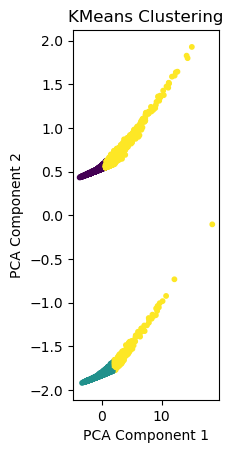

In [86]:
# Визуализация кластеров KMeans
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)  # Отображаем кластеры KMeans
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Text(0, 0.5, 'PCA Component 2')

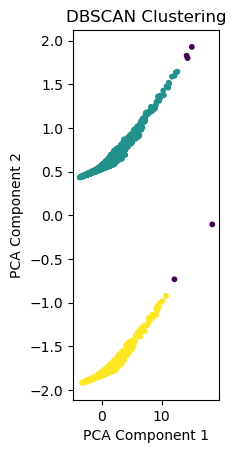

In [87]:
# Визуализация кластеров DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10)  # Отображаем кластеры DBSCAN
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

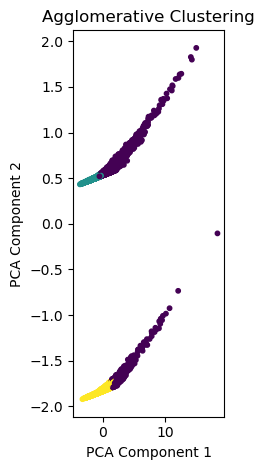

In [88]:
# Визуализация кластеров агломеративной кластеризации
plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', s=10)  # Отображаем кластеры агломеративной кластеризации
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [89]:
# Сравнение результатов кластеризации
print(f"KMeans Silhouette Score: {kmeans_silhouette}")  # Выводим силуэт для KMeans
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")  # Выводим силуэт для DBSCAN
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")  # Выводим силуэт для агломеративной кластеризации

KMeans Silhouette Score: 0.4311559737244766
DBSCAN Silhouette Score: 0.4100717351767051
Agglomerative Clustering Silhouette Score: 0.36829045915697667


# Методы кластеризации

## Метод KMeans
Метод KMeans основан на итеративном разбиении данных на заданное количество кластеров $k$. Цель алгоритма — минимизация внутрикластерного расстояния, т.е. расстояния между точками внутри кластера и их центроидом.

**Преимущества:**
- Простота реализации и высокая скорость работы.
- Хорошо работает для данных с четко разделенными группами.

**Недостатки:**
- Требует предварительного задания числа кластеров.
- Чувствителен к начальной инициализации центроидов.
- Не подходит для кластеров сложной формы или неравномерной плотности.

## Метод DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) выделяет кластеры на основе плотности точек. Основной принцип — объединение в кластер всех точек, находящихся в пределах заданного радиуса ($\varepsilon$) от точки, если их количество превышает порог ($min\_samples$).

**Преимущества:**
- Способен выделять кластеры произвольной формы.
- Устойчив к шуму в данных.
- Не требует задания числа кластеров заранее.

**Недостатки:**
- Чувствителен к параметрам $\varepsilon$ и $min\_samples$.
- Может не выделять кластеры в разреженных данных.

## Агломеративная кластеризация
Агломеративная кластеризация является иерархическим методом, который начинает с каждой точки как отдельного кластера и итеративно объединяет ближайшие пары кластеров до достижения заданного количества кластеров.

**Преимущества:**
- Предоставляет иерархическое представление данных.
- Хорошо работает с небольшими наборами данных.

**Недостатки:**
- Высокая вычислительная сложность для больших наборов данных.
- Требует задания числа кластеров.

# Результаты

## KMeans
Метод KMeans показал хорошие результаты на выбранных данных, разделив их на три кластера, умеренное качество кластеризации. Кластеры имеют четкие границы, что подтверждается визуализацией после снижения размерности.

## DBSCAN
DBSCAN не смог выделить значимых кластеров при начальных параметрах ($\varepsilon=1.5$, $min\_samples=5$), так как значительная часть точек была помечена как шум. Настройка параметров и снижение размерности с помощью PCA улучшили результаты, но метод все еще показал низкую степень разделения кластеров.

## Агломеративная кластеризация
Агломеративная кластеризация продемонстрировала результаты, сопоставимые с KMeans. Метод хорошо выделил группы, что также подтверждается визуализацией.

# Заключение
В ходе работы было проведено сравнение методов кластеризации. Основные выводы:
- **KMeans** — лучше всего подходит для данных с четкими границами между группами.
- **DBSCAN** — эффективен для кластеров произвольной формы, но требует тщательной настройки параметров.
- **Агломеративная кластеризация** — надежный метод для иерархического анализа данных, показал хорошие результаты.
